In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
%matplotlib inline

In [3]:
dataset = pd.read_csv("dataset1.csv")
dataset.shape
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


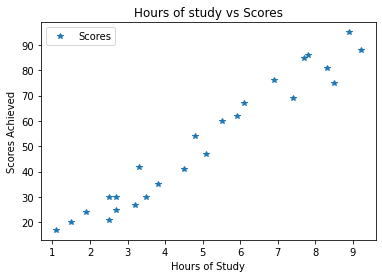

In [5]:
dataset.plot(x="Hours",y="Scores",style="*")
plt.title("Hours of study vs Scores")
plt.xlabel("Hours of Study")
plt.ylabel("Scores Achieved")
plt.show()

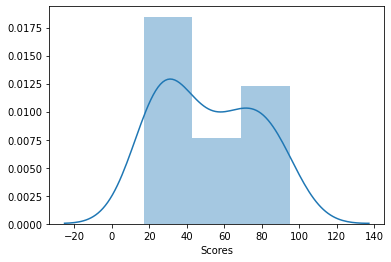

In [7]:
seaborn.distplot(dataset['Scores'])

In [40]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [42]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [43]:
intercept = LR.intercept_
coef = LR.coef_
print(intercept, coef)

2.018160041434683 [9.91065648]


In [44]:
y_pred = LR.predict(X_test)
df = pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


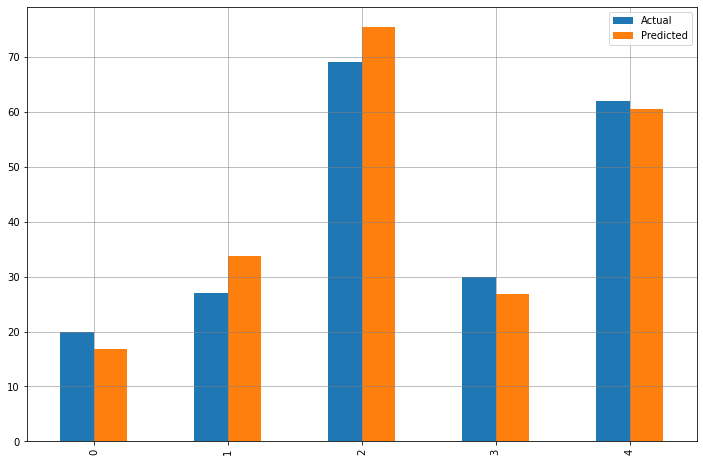

In [45]:
df.plot(kind="bar", figsize=(12,8))
plt.grid(which="major", linestyle="-", linewidth ="0.5", color = "grey")
plt.grid(which="minor", linestyle=":", linewidth ="0.5")
plt.show()

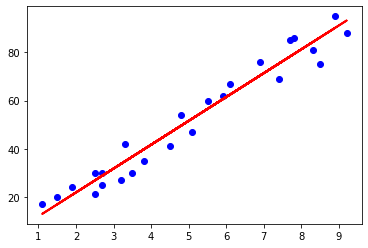

In [46]:
line =  X*coef + intercept
plt.scatter(X, y, color="blue")
plt.plot(X, line , linewidth = 2, color="red")
plt.show()

In [49]:
hours = 9.25
prediction = LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [54]:
r_sqr = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Squared Error is:", r_sqr)

Mean Squared Error is: 4.183859899002975
